In [2]:
%matplotlib inline

In [3]:
#Import dependencies
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# File to Load 
nut_data = "Resources/starbucks_drinkMenu_expanded.csv"
nut_data = pd.read_csv(nut_data)
nut_data

,Beverage_category,Beverage,Beverage_prep,Size,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Short,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,Venti,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Nonfat Milk,Tall,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,Tall,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,Tall,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [5]:
engine = create_engine(f"sqlite:///Resources/nutrition.sqlite")
conn = engine.connect()

In [6]:
nut_data.to_sql("nutrition",conn,if_exists='append')


In [7]:
nutri_data = pd.read_sql_query('SELECT * FROM nutrition', engine)
nutri_data

,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0,Coffee,Brewed Coffee,Short,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,1,Coffee,Brewed Coffee,Tall,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,2,Coffee,Brewed Coffee,Grande,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,3,Coffee,Brewed Coffee,Venti,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,4,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Short,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,Venti,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
480,238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Nonfat Milk,Tall,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
481,239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,Tall,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
482,240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,Tall,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [8]:
nutri_data.isnull().sum()

index                        0
Beverage_category            0
Beverage                     0
Beverage_prep                0
Size                         0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                2
dtype: int64

In [9]:
nutri_data = nutri_data.dropna()
nutri_data

,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0,Coffee,Brewed Coffee,Short,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,1,Coffee,Brewed Coffee,Tall,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,2,Coffee,Brewed Coffee,Grande,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,3,Coffee,Brewed Coffee,Venti,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,4,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Short,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,Venti,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
480,238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Nonfat Milk,Tall,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
481,239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,Tall,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
482,240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,Tall,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [10]:
# nut_data.rename(columns={'Total Fat (g)':'Total_fat_g'}, inplace = True) #, 'Trans Fat (g)':'Trans_fat_g','Saturated Fat (g)':'Saturated_fat_g','Sodium (mg)':'Sodium_mg','Total Carbohydrates (g)':'Total_carbs_g','Cholesterol (mg)':'Cholesterol_mg','Dietary Fibre (g)':'Dietary_fibre_g','Sugars (g)':'Sugars_g','Protein (g)':'Protein_g','Vitamin A (% DV)':'Vitamin_A','Vitamin C (% DV)':'Vitamin_C','Calcium (% DV)':'Calcium','Iron (% DV)':'Iron','Caffeine (mg)':'Caffeine_mg'}, inplace = True)
# nut_data

nutri_data.columns = nutri_data.columns.str.replace(' ', '')
nutri_data

,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
0,0,Coffee,Brewed Coffee,Short,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,1,Coffee,Brewed Coffee,Tall,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,2,Coffee,Brewed Coffee,Grande,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,3,Coffee,Brewed Coffee,Venti,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,4,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Short,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,Venti,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
480,238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Nonfat Milk,Tall,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
481,239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,Tall,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
482,240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,Tall,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [11]:
# sugar_data=nutri_data[nutri_data['Sugars(g)']> 70]
# sugar_data
cholesterol_data = nutri_data[(nutri_data['Cholesterol(mg)'] >= 70) & (nutri_data['Sodium(mg)'] >= 5)].groupby('Beverage')
cholesterol_data.head()

,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
83,83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Nonfat Milk,Venti,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,Venti,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
85,85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,Venti,460,13,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
127,127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Nonfat Milk,Venti,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30%,20%,60%,6%,110
128,128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,Venti,450,10,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110
187,187,Frappuccino® Blended Coffee,Coffee,Nonfat Milk,Venti,310,0.1,0.1,0.0,5,300,70,0,69,6.0,10%,0%,20%,6%,95
188,188,Frappuccino® Blended Coffee,Coffee,Whole Milk,Venti,350,5,3.0,0.2,15,300,70,0,69,5.0,8%,0%,15%,2%,130
196,196,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Nonfat Milk,Venti,340,1,0.5,0.0,5,300,80,1,76,7.0,10%,0%,15%,10%,140
197,197,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,Venti,390,6,3.5,0.1,15,300,80,1,76,6.0,8%,0%,15%,10%,140
205,205,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Nonfat Milk,Venti,330,0.1,0.1,0.0,5,290,78,0,77,5.0,10%,0%,15%,2%,130


In [12]:
vita_data_max = nutri_data[["Beverage", "VitaminA(%DV)","VitaminC(%DV)","Calcium(%DV)","Iron(%DV)"]]
vita_data_max

,Beverage,VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
0,Brewed Coffee,0%,0%,0%,0%
1,Brewed Coffee,0%,0%,0%,0%
2,Brewed Coffee,0%,0%,0%,0%
3,Brewed Coffee,0%,0%,2%,0%
4,Caffè Latte,10%,0%,20%,0%
...,...,...,...,...,...
479,Strawberries & Crème (Without Whipped Cream),6%,8%,20%,10%
480,Vanilla Bean (Without Whipped Cream),6%,0%,10%,0%
481,Vanilla Bean (Without Whipped Cream),6%,0%,10%,0%
482,Vanilla Bean (Without Whipped Cream),4%,0%,10%,6%


In [28]:
high_protein=nutri_data[nutri_data['Protein(g)']>=18]
high_protein

,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
83,83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Nonfat Milk,Venti,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,Venti,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
95,95,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Nonfat Milk,Venti,320,3,2.0,0.0,10,180,63,2,55,18.0,25%,0%,50%,30%,30
127,127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Nonfat Milk,Venti,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30%,20%,60%,6%,110
172,172,Smoothies,Banana Chocolate Smoothie,Nonfat Milk,Grande,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
173,173,Smoothies,Banana Chocolate Smoothie,2% Milk,Grande,300,5,2.5,0.1,15,160,53,7,34,20.0,8%,15%,20%,20%,15
174,174,Smoothies,Banana Chocolate Smoothie,Soymilk,Grande,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15
325,83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Nonfat Milk,Venti,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
326,84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,Venti,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
337,95,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Nonfat Milk,Venti,320,3,2.0,0.0,10,180,63,2,55,18.0,25%,0%,50%,30%,30


In [29]:
hg_protein = high_protein[["Beverage", "Protein(g)"]]
hg_protein

,Beverage,Protein(g)
83,White Chocolate Mocha (Without Whipped Cream),19.0
84,White Chocolate Mocha (Without Whipped Cream),19.0
95,Hot Chocolate (Without Whipped Cream),18.0
127,Tazo® Green Tea Latte,18.0
172,Banana Chocolate Smoothie,20.0
173,Banana Chocolate Smoothie,20.0
174,Banana Chocolate Smoothie,19.0
325,White Chocolate Mocha (Without Whipped Cream),19.0
326,White Chocolate Mocha (Without Whipped Cream),19.0
337,Hot Chocolate (Without Whipped Cream),18.0


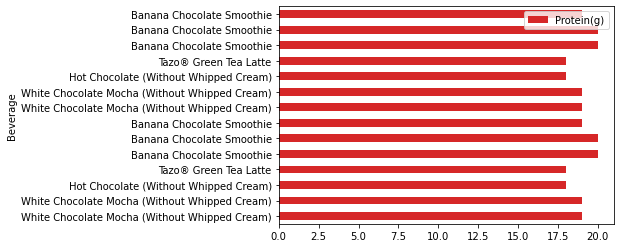

In [30]:
ax = hg_protein.plot(y="Protein(g)", x="Beverage", kind="barh",color='C3')


#hg_protein.plot(y="GDP", x="Country", kind="bar", ax=ax, color="C2",)

plt.show()

In [21]:
corr_data = nutri_data[['Calories', 'TotalFat(g)','TransFat(g)', 'SaturatedFat(g)', 'Sodium(mg)', 'TotalCarbohydrates(g)', 'Cholesterol(mg)', 'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)']]
corr_data

,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g)
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...
479,320,3 2,0.4,0.0,0,250,67,1,64,5.0
480,170,0.1,0.1,0.0,0,160,39,0,38,4.0
481,200,3.5,2.0,0.1,10,160,39,0,38,3.0
482,180,1.5,0.2,0.0,0,160,37,1,35,3.0


<AxesSubplot:>

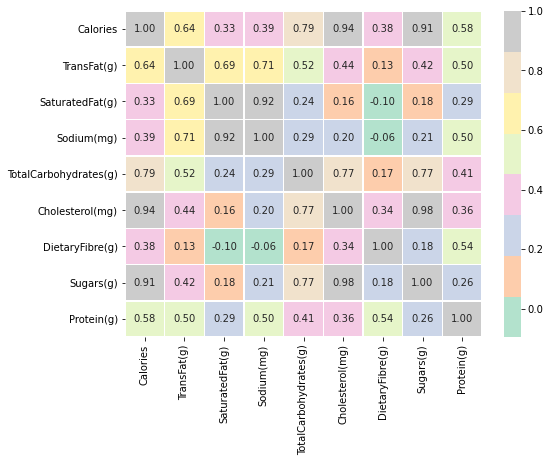

In [23]:
# shows that Cholestrol has a high correlation with Clories, Sugar and Total Carbs.
# Shows that Sodium has a high correlation with Saturated fat.

f,ax =plt.subplots(figsize=(8,6))
plt.xticks(rotation=60)
sns.heatmap(corr_data.corr(),annot=True,linewidth =.5,cmap = 'Pastel2',fmt ='.2f',ax=ax)

In [34]:
grande_df = nutri_data[ nutri_data["Size"] == "Grande" ]
grande_df


,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
2,2,Coffee,Brewed Coffee,Grande,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
10,10,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Grande,130,0.3,0.2,0.0,5,150,19,0,18,13.0,20%,0%,40%,0%,150
11,11,Classic Espresso Drinks,Caffè Latte,2% Milk,Grande,190,7,3.5,0.2,30,170,19,0,17,12.0,20%,2%,40%,0%,150
12,12,Classic Espresso Drinks,Caffè Latte,Soymilk,Grande,150,5,0.5,0.0,0,130,13,1,8,10.0,15%,0%,40%,15%,150
22,22,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Nonfat Milk,Grande,220,2.5,1.5,0.0,5,125,43,2,34,13.0,20%,0%,35%,25%,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,227,Frappuccino® Light Blended Coffee,Java Chip,Nonfat Milk,Grande,220,4,3.0,0.0,0,240,43,2,39,5.0,6%,0%,10%,25%,105
474,232,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Nonfat Milk,Grande,230,0.2,0.1,0.0,0,190,53,0,52,4.0,8%,6%,15%,4%,0
475,233,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,Grande,260,4,2.0,0.1,10,190,53,0,52,4.0,6%,6%,15%,4%,0
476,234,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,Grande,240,2,0.2,0.0,0,180,51,1,49,3.0,4%,6%,15%,8%,0
